IMPORTING RELEVANT MODULES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree


INTRODUCTION

Safaricom, through their m-tiba subsidiary wants to understand the leading factors in determining whether people would take the seasonal flu vaccine in order to put in the right strategies for their public efforts and vaccination campaigns to educate the public, raise awareness while maximizing vaccine intake.
My objective is to build a classifier to predict seasonal flu vaccination status using data they shared on their behaviours, oponions and demographic characteristics.

DATA AND BUSINESS UNDERSTANDING.

The data was obtained from the National 2009 H1N1 Flu Survey. 
People were unterviewed through phone calls.
My target in this project will be seasonal_flu and predictors will be people's opinions, hevaviours and demographic features.

LOADING THE DATASETS

In [3]:
df1 = pd.read_csv("training_set_features.csv")

df1.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
df2 = pd.read_csv("training_set_labels.csv")

df2.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


I used two data sets namely: training_set_csv and training_set_features
Merging the two datasets:

In [5]:
training_set = pd.merge(df1, df2, on='respondent_id')

training_set.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [6]:
training_set.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [7]:
training_set.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

DATA CLEANING.

Dealing with null values.

In [8]:
missing_values = training_set.isnull().sum()
missing_sorted = missing_values.sort_values(ascending=False)

missing_sorted

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_adults                 249
household_children               249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n1_concern                      92
behavioral_large_gatherings       87
behavioral_outside_home           82
b

The variables with the highest number of null values were dropped.

Numerical variables with few null values were replaced with the median while categorical variables with the mode.

In [9]:
columns_to_drop = ['employment_occupation', 'employment_industry', 'health_insurance', 'respondent_id']
training_set = training_set.drop(columns_to_drop, axis=1, errors='ignore')


In [10]:

numerical_cols = training_set.select_dtypes(include=['float64']).columns
for col in numerical_cols:
    training_set[col].fillna(training_set[col].median(), inplace=True)

categorical_cols = training_set.select_dtypes(include=['object']).columns
for col in categorical_cols:
    training_set[col].fillna(training_set[col].mode()[0], inplace=True)



We confirmed that there are no null values

In [11]:
print(training_set.isnull().sum())

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_

Checking for duplicates:

In [12]:
duplicate_columns = training_set.columns[training_set.columns.duplicated()]
print("Duplicate Columns:", duplicate_columns)

Duplicate Columns: Index([], dtype='object')


DATA EXPLORATION AND ANALYSIS

In [13]:
training_set.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'h1n1_vaccine',
       'seasonal_vaccine'],
      dtype='object')

Distribution of the target variable

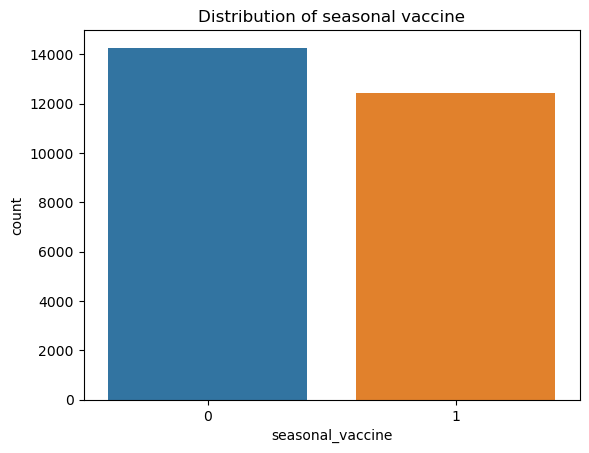

In [14]:
sns.countplot(x='seasonal_vaccine', data=training_set)
plt.title('Distribution of seasonal vaccine')
plt.show()

Plotting seasonal_vaccine against various variables

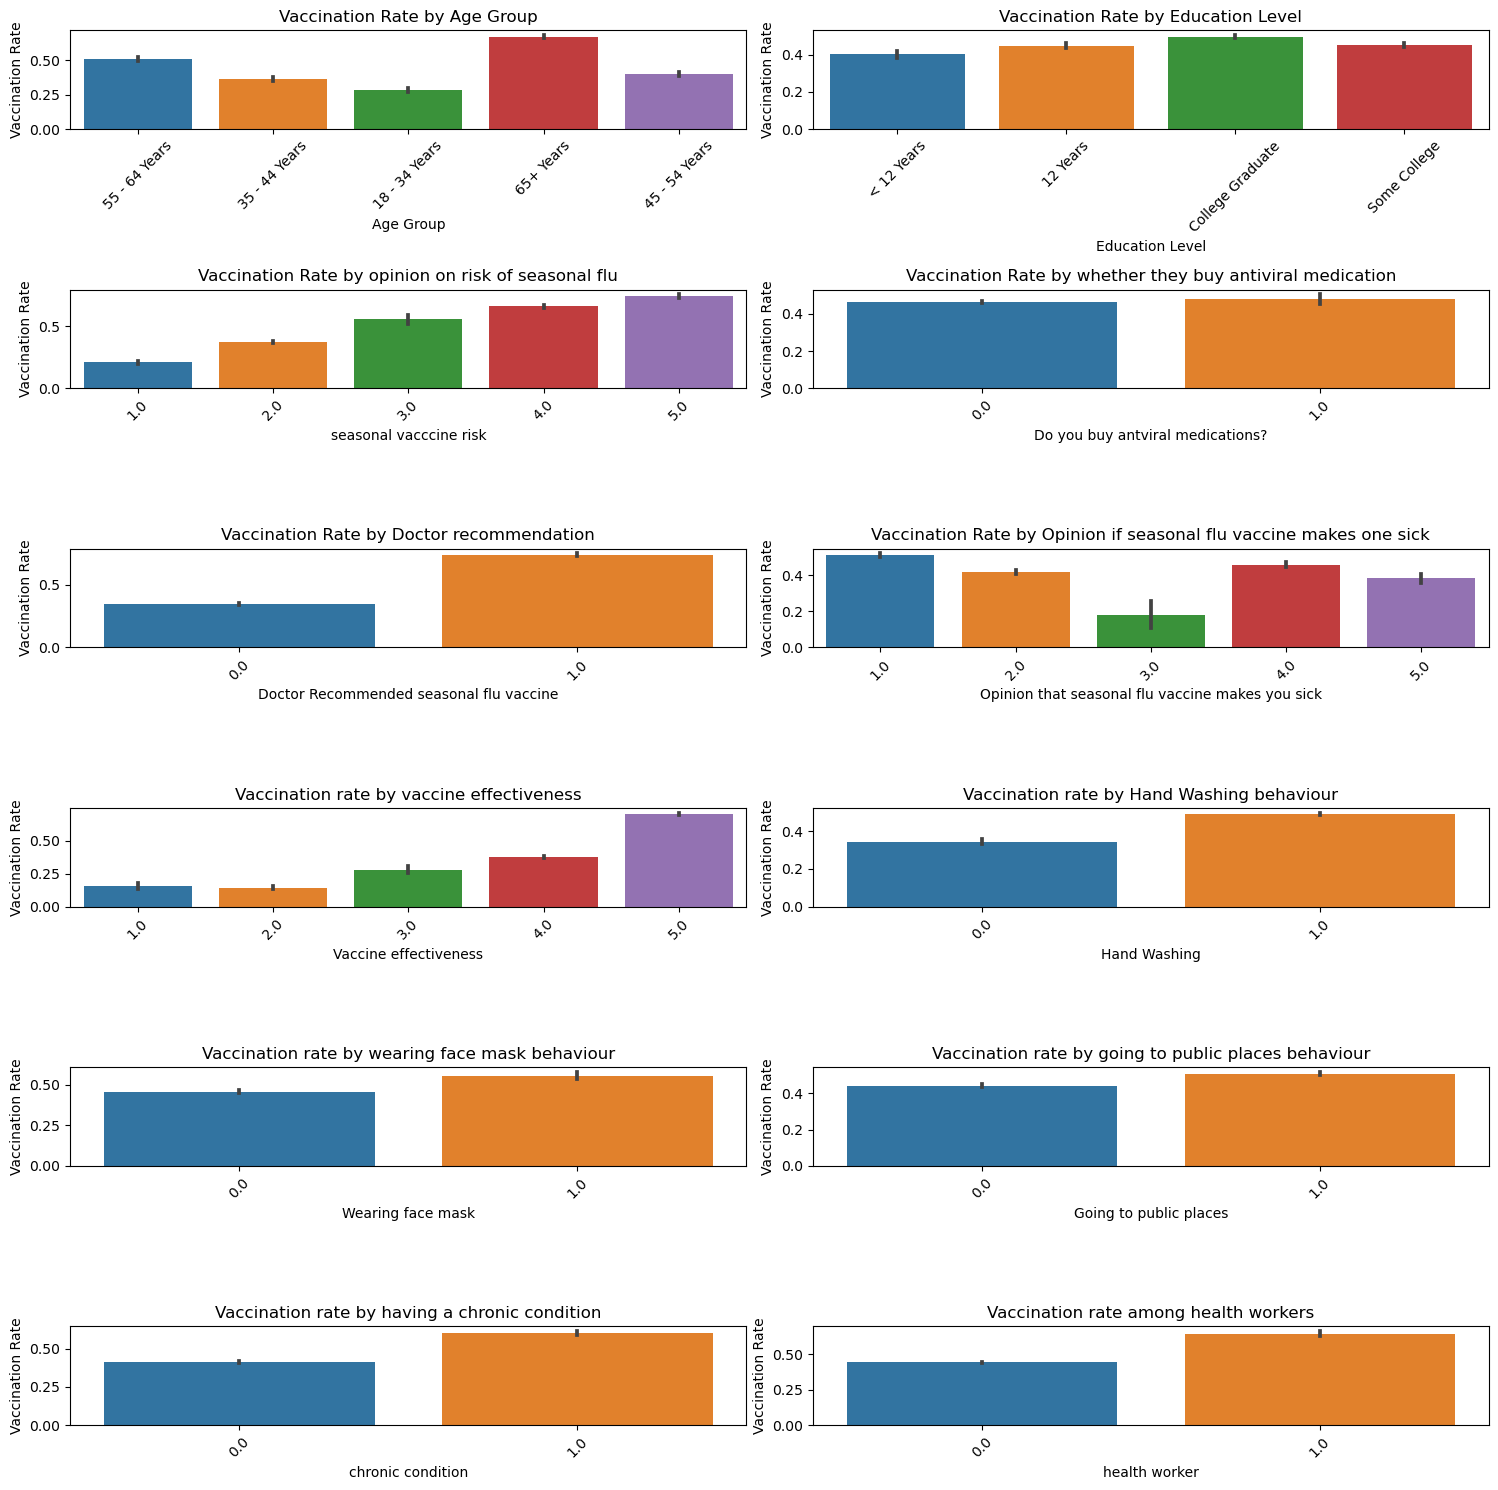

In [15]:
fig, axes = plt.subplots(6, 2, figsize=(15, 15))

sns.barplot(x='age_group', y='seasonal_vaccine', data=training_set, ax=axes[0, 0])
axes[0, 0].set_title('Vaccination Rate by Age Group')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Vaccination Rate')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.barplot(x='education', y='seasonal_vaccine', data=training_set, ax=axes[0, 1])
axes[0, 1].set_title('Vaccination Rate by Education Level')
axes[0, 1].set_xlabel('Education Level')
axes[0, 1].set_ylabel('Vaccination Rate')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.barplot(x='opinion_seas_risk', y='seasonal_vaccine', data=training_set, ax=axes[1, 0])
axes[1, 0].set_title('Vaccination Rate by opinion on risk of seasonal flu')
axes[1, 0].set_xlabel('seasonal vacccine risk')
axes[1, 0].set_ylabel('Vaccination Rate')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.barplot(x='behavioral_antiviral_meds', y='seasonal_vaccine', data=training_set, ax=axes[1, 1])
axes[1, 1].set_title('Vaccination Rate by whether they buy antiviral medication')
axes[1, 1].set_xlabel('Do you buy antviral medications?')
axes[1, 1].set_ylabel('Vaccination Rate')
axes[1, 1].tick_params(axis='x', rotation=45)

sns.barplot(x='doctor_recc_seasonal', y='seasonal_vaccine', data=training_set, ax=axes[2, 0])
axes[2, 0].set_title('Vaccination Rate by Doctor recommendation')
axes[2, 0].set_xlabel('Doctor Recommended seasonal flu vaccine')
axes[2, 0].set_ylabel('Vaccination Rate')
axes[2, 0].tick_params(axis='x', rotation=45)

sns.barplot(x='opinion_seas_sick_from_vacc', y='seasonal_vaccine', data=training_set, ax=axes[2, 1])
axes[2, 1].set_title('Vaccination Rate by Opinion if seasonal flu vaccine makes one sick')
axes[2, 1].set_xlabel('Opinion that seasonal flu vaccine makes you sick')
axes[2, 1].set_ylabel('Vaccination Rate')
axes[2, 1].tick_params(axis='x', rotation=45)

sns.barplot(x='opinion_seas_vacc_effective', y='seasonal_vaccine', data=training_set, ax=axes[3, 0])
axes[3, 0].set_title('Vaccination rate by vaccine effectiveness')
axes[3, 0].set_xlabel('Vaccine effectiveness')
axes[3, 0].set_ylabel('Vaccination Rate')
axes[3, 0].tick_params(axis='x', rotation=45)

sns.barplot(x='behavioral_wash_hands', y='seasonal_vaccine', data=training_set, ax=axes[3, 1])
axes[3, 1].set_title('Vaccination rate by Hand Washing behaviour')
axes[3, 1].set_xlabel('Hand Washing')
axes[3, 1].set_ylabel('Vaccination Rate')
axes[3, 1].tick_params(axis='x', rotation=45)

sns.barplot(x='behavioral_face_mask', y='seasonal_vaccine', data=training_set, ax=axes[4, 0])
axes[4, 0].set_title('Vaccination rate by wearing face mask behaviour')
axes[4, 0].set_xlabel('Wearing face mask')
axes[4, 0].set_ylabel('Vaccination Rate')
axes[4, 0].tick_params(axis='x', rotation=45)

sns.barplot(x='behavioral_large_gatherings', y='seasonal_vaccine', data=training_set, ax=axes[4, 1])
axes[4, 1].set_title('Vaccination rate by going to public places behaviour')
axes[4, 1].set_xlabel('Going to public places')
axes[4, 1].set_ylabel('Vaccination Rate')
axes[4, 1].tick_params(axis='x', rotation=45)

sns.barplot(x='chronic_med_condition', y='seasonal_vaccine', data=training_set, ax=axes[5, 0])
axes[5, 0].set_title('Vaccination rate by having a chronic condition')
axes[5, 0].set_xlabel('chronic condition')
axes[5, 0].set_ylabel('Vaccination Rate')
axes[5, 0].tick_params(axis='x', rotation=45)

sns.barplot(x='health_worker', y='seasonal_vaccine', data=training_set, ax=axes[5, 1])
axes[5, 1].set_title('Vaccination rate among health workers')
axes[5, 1].set_xlabel('health worker')
axes[5, 1].set_ylabel('Vaccination Rate')
axes[5, 1].tick_params(axis='x', rotation=45)
plt.tight_layout()

plt.show()


From the visualizations we can conclude that the following characteristics/hebaviours are associated with more seasonal flu vaccine uptake:
1. People with chronic health conditions.
2. Health worker profession.
3. Belief that the vaccine is efficacious.
4. Reccomendation on the seasonal flu vaccine uptake by a doctor.
5. Awareness of the risks associated with the seasonal flu.
6. People over 65 years
7. People who wear facemasks and wash hands are more likely to take the seasonal flu vaccine


We selected the following variables to use in our classification model:

'behavioral_large_gatherings', 'behavioral_face_mask', 'behavioral_wash_hands', 'opinion_seas_vacc_effective', 'opinion_seas_sick_from_vacc', 'education', 'age_group', 'seasonal_vaccine', 'chronic_med_condition', 'health_worker', 'doctor_recc_seasonal', 'behavioral_antiviral_meds', 'opinion_seas_risk'


We converted our predictors to categorical variables for one hot encoding.

In [17]:
columns_to_keep = ['behavioral_large_gatherings', 'behavioral_face_mask', 'behavioral_wash_hands', 'opinion_seas_vacc_effective', 'opinion_seas_sick_from_vacc', 'education', 'age_group', 'seasonal_vaccine', 'chronic_med_condition', 'health_worker', 'doctor_recc_seasonal', 'behavioral_antiviral_meds', 'opinion_seas_risk']

training_set_final = training_set[columns_to_keep]

training_set_final.loc[:, 'education'] = training_set_final['education'].astype('category')
training_set_final.loc[:, 'age_group'] = training_set_final['age_group'].astype('category')
training_set_final.loc[:, 'behavioral_large_gatherings'] = training_set_final['behavioral_large_gatherings'].astype('category')
training_set_final.loc[:, 'behavioral_face_mask'] = training_set_final['behavioral_face_mask'].astype('category')
training_set_final.loc[:, 'behavioral_wash_hands'] = training_set_final['behavioral_wash_hands'].astype('category')
training_set_final.loc[:, 'opinion_seas_vacc_effective'] = training_set_final['opinion_seas_vacc_effective'].astype('category')
training_set_final.loc[:, 'opinion_seas_sick_from_vacc'] = training_set_final['opinion_seas_sick_from_vacc'].astype('category')
training_set_final.loc[:, 'chronic_med_condition'] = training_set_final['chronic_med_condition'].astype('category')
training_set_final.loc[:, 'health_worker'] = training_set_final['health_worker'].astype('category')
training_set_final.loc[:, 'doctor_recc_seasonal'] = training_set_final['doctor_recc_seasonal'].astype('category')
training_set_final.loc[:, 'opinion_seas_risk'] = training_set_final['opinion_seas_risk'].astype('category')
training_set_final.loc[:, 'behavioral_antiviral_meds'] = training_set_final['behavioral_antiviral_meds'].astype('category')



one_hot_cols = ['education','age_group', 'behavioral_large_gatherings', 'behavioral_face_mask', 'behavioral_wash_hands', 'opinion_seas_vacc_effective', 'opinion_seas_sick_from_vacc', 'chronic_med_condition', 'health_worker', 'doctor_recc_seasonal', 'opinion_seas_risk', 'behavioral_antiviral_meds']

dummy = pd.get_dummies(training_set_final, columns=one_hot_cols, dummy_na=False)
training_set_e = pd.concat([training_set_final, dummy], axis=1)
training_set_e.drop(['education', 'age_group'], axis=1, inplace=True)

training_set_e.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   behavioral_large_gatherings      26707 non-null  category
 1   behavioral_face_mask             26707 non-null  category
 2   behavioral_wash_hands            26707 non-null  category
 3   opinion_seas_vacc_effective      26707 non-null  category
 4   opinion_seas_sick_from_vacc      26707 non-null  category
 5   seasonal_vaccine                 26707 non-null  int64   
 6   chronic_med_condition            26707 non-null  category
 7   health_worker                    26707 non-null  category
 8   doctor_recc_seasonal             26707 non-null  category
 9   behavioral_antiviral_meds        26707 non-null  category
 10  opinion_seas_risk                26707 non-null  category
 11  seasonal_vaccine                 26707 non-null  int64   
 12  educ

Correlation matrix to see how our predictors are correlated to the target

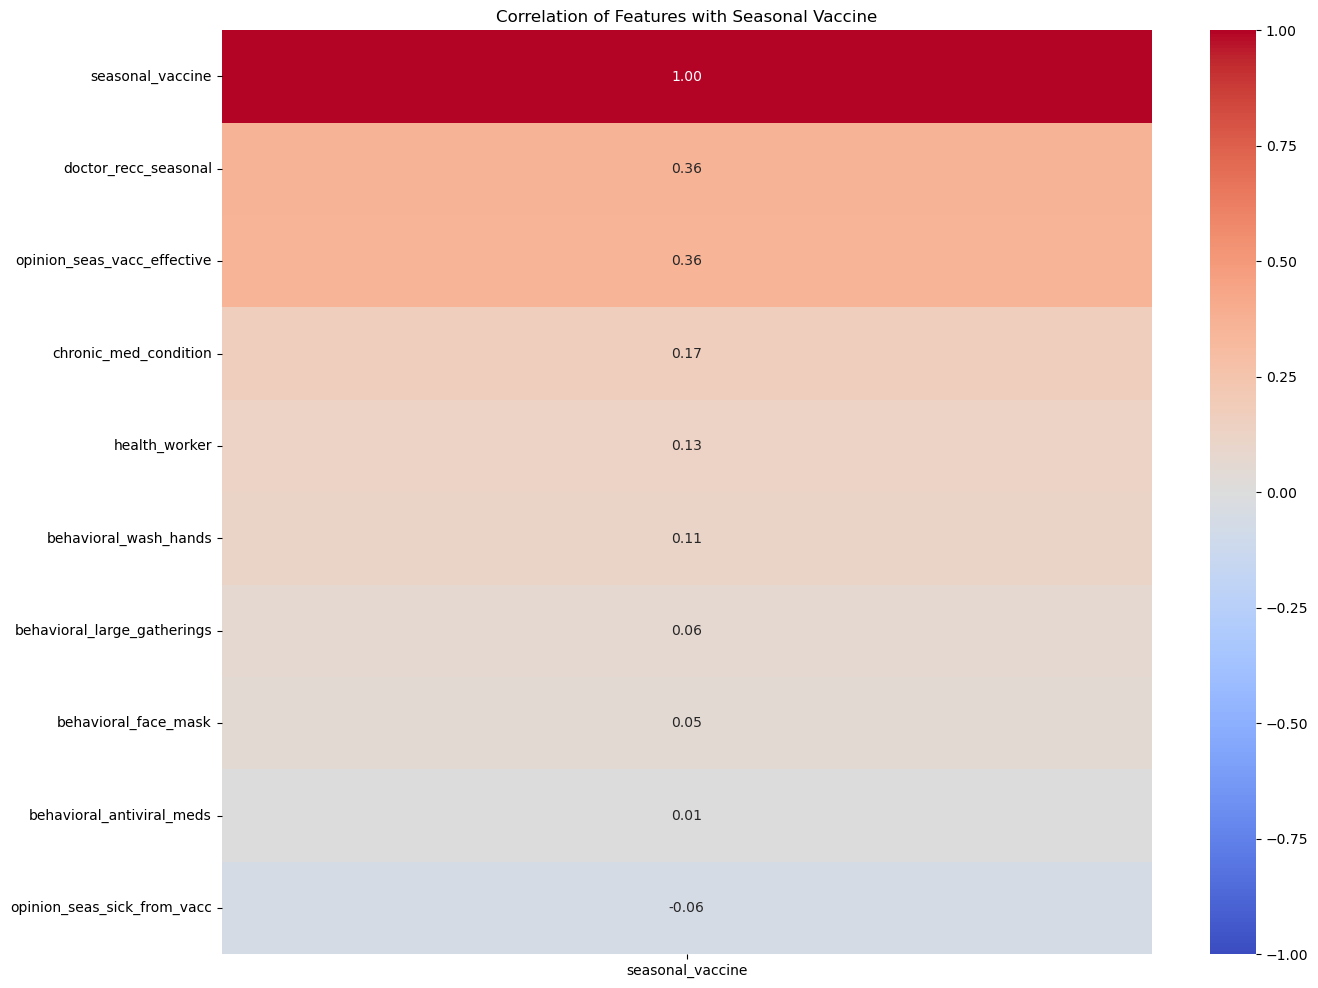

,seasonal_vaccine
seasonal_vaccine,1.000000
doctor_recc_seasonal,0.360696
opinion_seas_vacc_effective,0.358869
chronic_med_condition,0.169465
health_worker,0.126977
behavioral_wash_hands,0.112254
behavioral_large_gatherings,0.063722
behavioral_face_mask,0.050020
behavioral_antiviral_meds,0.006013
opinion_seas_sick_from_vacc,-0.060538


In [40]:

training_set_e_unique = training_set_e.loc[:, ~training_set_e.columns.duplicated()]

correlation_matrix = training_set_e_unique.corr().head(10)

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix[['seasonal_vaccine']].sort_values(by='seasonal_vaccine', ascending=False), 
            annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation of Features with Seasonal Vaccine')
plt.show()

correlation_matrix[['seasonal_vaccine']].sort_values(by='seasonal_vaccine', ascending=False).head(10)

We can conclude that being aware of the risks associated with the seasonal flu has the highest correlation with the uptake of the seasonal flu vaccine. This means that people should be sensitized more on the risks associated with the seasonal flu.
Other factors:
- Opinion that the vaccine is very safe.
- Recommendation by a doctor

MACHINE LEARNING MODELS

FEATURE SELECTION

We used the Chi square statistic test as the feature selection method using the 'SelectKBest' method from scikit-learn.

In [19]:

X = training_set_e.drop(columns=['seasonal_vaccine'])
y = training_set_e['seasonal_vaccine']

selector = SelectKBest(chi2, k='all')
selector.fit(X, y)
feature_scores = selector.scores_

feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False).reset_index()
print(feature_scores_df)


    index                          Feature        Score
0       9                opinion_seas_risk  2987.130334
1       7             doctor_recc_seasonal  2588.144293
2      40         doctor_recc_seasonal_1.0  2588.144293
3      29  opinion_seas_vacc_effective_5.0  2448.916900
4      41            opinion_seas_risk_1.0  1684.362692
5      44            opinion_seas_risk_4.0  1282.621744
6      18              age_group_65+ Years  1272.584863
7      39         doctor_recc_seasonal_0.0  1125.473589
8       3      opinion_seas_vacc_effective  1059.456214
9      45            opinion_seas_risk_5.0   990.120501
10     26  opinion_seas_vacc_effective_2.0   970.901990
11     14          age_group_18 - 34 Years   734.233745
12      5            chronic_med_condition   595.980801
13     36        chronic_med_condition_1.0   595.980801
14     25  opinion_seas_vacc_effective_1.0   496.056711
15     28  opinion_seas_vacc_effective_4.0   411.824294
16     38                health_worker_1.0   410

In [20]:
threshold = 0.1
drop_feature = feature_scores_df[feature_scores_df['Score']<threshold]['Feature'].values.tolist()
training_set_e.drop(drop_feature, axis = 1, inplace = True)

training_set_e = training_set_e.loc[:, ~training_set_e.columns.duplicated()]

training_set_e.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   behavioral_large_gatherings      26707 non-null  category
 1   behavioral_face_mask             26707 non-null  category
 2   behavioral_wash_hands            26707 non-null  category
 3   opinion_seas_vacc_effective      26707 non-null  category
 4   opinion_seas_sick_from_vacc      26707 non-null  category
 5   seasonal_vaccine                 26707 non-null  int64   
 6   chronic_med_condition            26707 non-null  category
 7   health_worker                    26707 non-null  category
 8   doctor_recc_seasonal             26707 non-null  category
 9   behavioral_antiviral_meds        26707 non-null  category
 10  opinion_seas_risk                26707 non-null  category
 11  education_12 Years               26707 non-null  bool    
 12  educ

We have retained all our predictors.

DECISION TREE CLASSIFIER

In [21]:

X = training_set_e.drop(columns=['seasonal_vaccine'])
y = training_set_e['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_classifier = DecisionTreeClassifier(random_state=42)

tree_classifier.fit(X_train, y_train)

y_pred = tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)


Model Accuracy: 0.719019093972295

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      2891
           1       0.71      0.66      0.68      2451

    accuracy                           0.72      5342
   macro avg       0.72      0.71      0.72      5342
weighted avg       0.72      0.72      0.72      5342



Evaluating the performance using a confusion matrix.

In [22]:
tree_classifier.classes_

array([0, 1], dtype=int64)

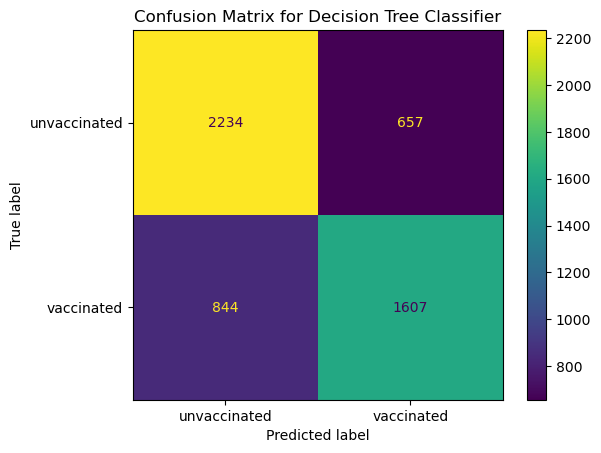

In [23]:

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['unvaccinated', 'vaccinated'])
disp.plot()
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


In [24]:
tp = conf_matrix[1, 1]

tn = conf_matrix[0, 0]

fp = conf_matrix[0, 1]

fn = conf_matrix[1, 0]

accuracy = (tp + tn) / (tp + tn + fp + fn)

precision = tp / (tp + fp)

recall = tp / (tp + fn)

f1_score = 2 * (precision * recall) / (precision + recall)

specificity = tn / (tn + fp)

print("Confusion Matrix Analysis:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Specificity: {specificity:.4f}")


Confusion Matrix Analysis:
Accuracy: 0.7190
Precision: 0.7098
Recall (Sensitivity): 0.6557
F1 Score: 0.6817
Specificity: 0.7727


The model captures 65.57% of the positive instances and makes fewer false negative predictions with a specificity of 77.27%. 

71.90% of instances were classified correctly. 

Evaluating the performance of the model using ROC.

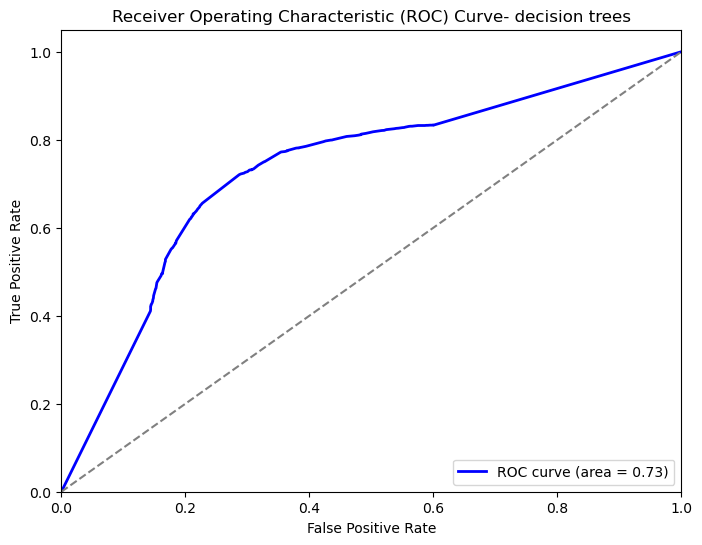

In [25]:

# Get the predicted probabilities for class 1
y_pred_proba = tree_classifier.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve- decision trees')
plt.legend(loc='lower right')
plt.show()


Gradient boosting the Decision Tree classifier.

In [26]:

X = training_set_e.drop(columns=['seasonal_vaccine'])
y = training_set_e['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)

gradient_boosting_classifier.fit(X_train, y_train)

y_pred = gradient_boosting_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)


Model Accuracy: 0.7798577311868214

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      2891
           1       0.77      0.75      0.76      2451

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



After gradient boosting, accuracy goes up from 71% to 78%.

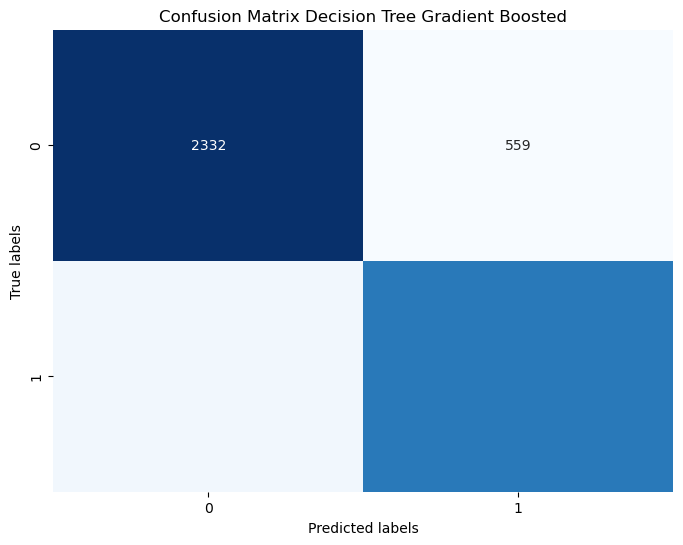

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrixz = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixz, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Decision Tree Gradient Boosted')
plt.show()


In [28]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

accuracyz = accuracy_score(y_test, y_pred)

precisionz = precision_score(y_test, y_pred)

recallz = recall_score(y_test, y_pred)

specificityz = conf_matrixz[0, 0] / (conf_matrixz[0, 0] + conf_matrixz[0, 1])

print("Accuracy:", accuracyz)
print("Precision:", precisionz)
print("Recall (Sensitivity):", recallz)
print("Specificity:", specificityz)


Accuracy: 0.7798577311868214
Precision: 0.766402005850397
Recall (Sensitivity): 0.7482660138718891
Specificity: 0.8066413005880319


After gradient-boosting, the model performs better. 

The accuracy is up from 72% to 78%.

78% of instances were correctly classified up from 72%.

The model is capturing 74% of positive cases up from 66%.



Evaluating the gradient-boosted model using ROC

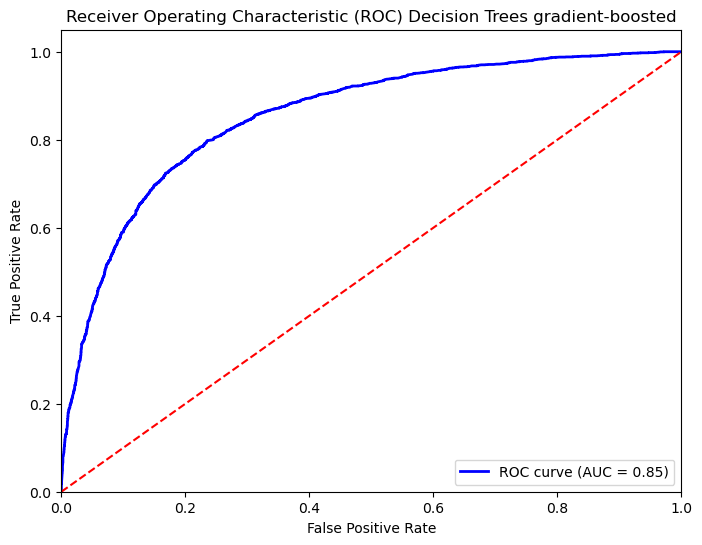

In [29]:

y_prob = gradient_boosting_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Decision Trees gradient-boosted')
plt.legend(loc='lower right')
plt.show()


we have a much better ROC of 0.85 from 0.73

GAUSSIAN NAIVE BAYES

In [30]:

X = training_set_e.drop(columns=['seasonal_vaccine'])
y = training_set_e['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

bayes_classifier = GaussianNB()


bayes_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = bayes_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)


Model Accuracy: 0.7545862972669413

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      2891
           1       0.71      0.78      0.74      2451

    accuracy                           0.75      5342
   macro avg       0.75      0.76      0.75      5342
weighted avg       0.76      0.75      0.76      5342



Assessing performance of the model using AUC

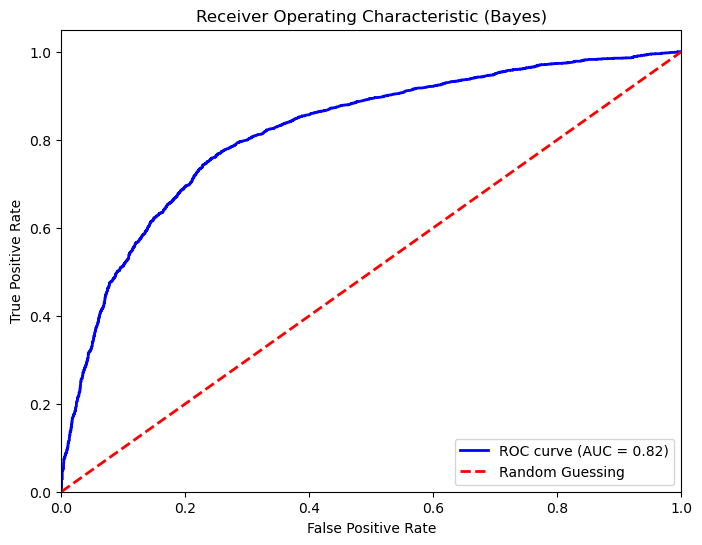

In [31]:

y_probs = bayes_classifier.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Bayes)')
plt.legend(loc="lower right")
plt.show()


This model has an AUC of 0.82.

RANDOM FOREST CLASSIFIER.

In [32]:

X = training_set_e.drop(columns=['seasonal_vaccine'])
y = training_set_e['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)


Model Accuracy: 0.7414825907899663

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2891
           1       0.72      0.72      0.72      2451

    accuracy                           0.74      5342
   macro avg       0.74      0.74      0.74      5342
weighted avg       0.74      0.74      0.74      5342



Our baseline model has an accuracy of 74%.

Assessing the performance using a confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate TP, TN, FP, FN
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Confusion Matrix:")
print(conf_matrix)
print("\nMetrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)


Confusion Matrix:
[[2200  691]
 [ 690 1761]]

Metrics:
Accuracy: 0.7414825907899663
Precision: 0.718189233278956
Sensitivity (Recall): 0.7184822521419829
Specificity: 0.7609823590453131


The baseline model has an accuracy of 74.14%.

Assessing the performance using ROC

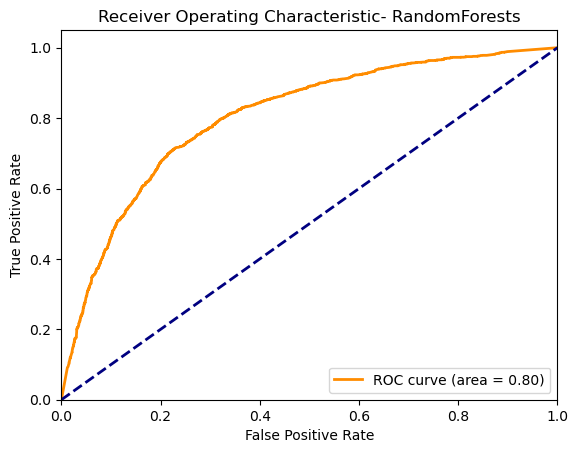

In [34]:
from sklearn.metrics import roc_curve, auc
# Get the predicted probabilities for class 1
y_pred_proba = rf_classifier.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic- RandomForests')
plt.legend(loc="lower right")
plt.show()


Hyperparameter tuning using GridSearchCV

In [36]:

X = training_set_e.drop(columns=['seasonal_vaccine'])
y = training_set_e['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Model Accuracy: 0.7714339198801947

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      2891
           1       0.76      0.73      0.75      2451

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



After hyperparameter tuning, the model has a better accuracy of 77.14%.

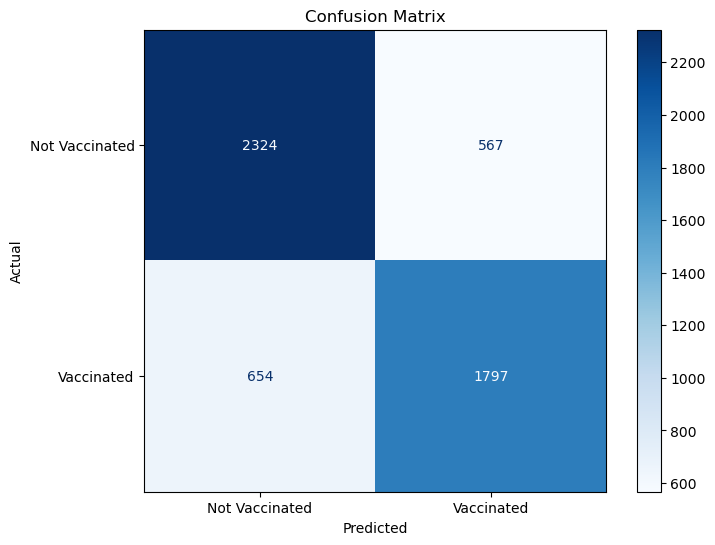

Sensitivity (Recall): 0.7332
Specificity: 0.8039
Accuracy: 0.7714
precision:0.7602 


In [ ]:

# Calculate confusion matrix
conf_matrix3 = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix3, display_labels=['Not Vaccinated', 'Vaccinated'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Interpretation
tn, fp, fn, tp = conf_matrix3.ravel()

# Calculate sensitivity (recall)
sensitivity_3 = tp / (tp + fn)

# Calculate specificity
specificity_3 = tn / (tn + fp)

accuracy_3 = (tp + tn) / (tp + tn +fp + fn)
precision_3 = tp/(tp+fp)
print(f"Sensitivity (Recall): {sensitivity_3:.4f}")
print(f"Specificity: {specificity_3:.4f}")
print(f"Accuracy: {accuracy_3:.4f}" )
print(f"precision:{precision_3:.4f} ")

Evaluating performance using ROC:

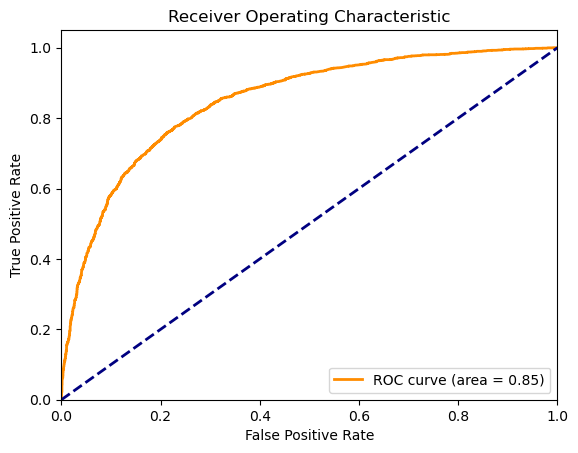

In [ ]:


# Get the best estimator from GridSearchCV
best_rf_classifier = grid_search.best_estimator_

# Make predictions (probability estimates)
y_pred_proba = best_rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


DISCUSSION.

COMPARISON IN PERFORMANCE BETWEEN DIFFERENT MODELS

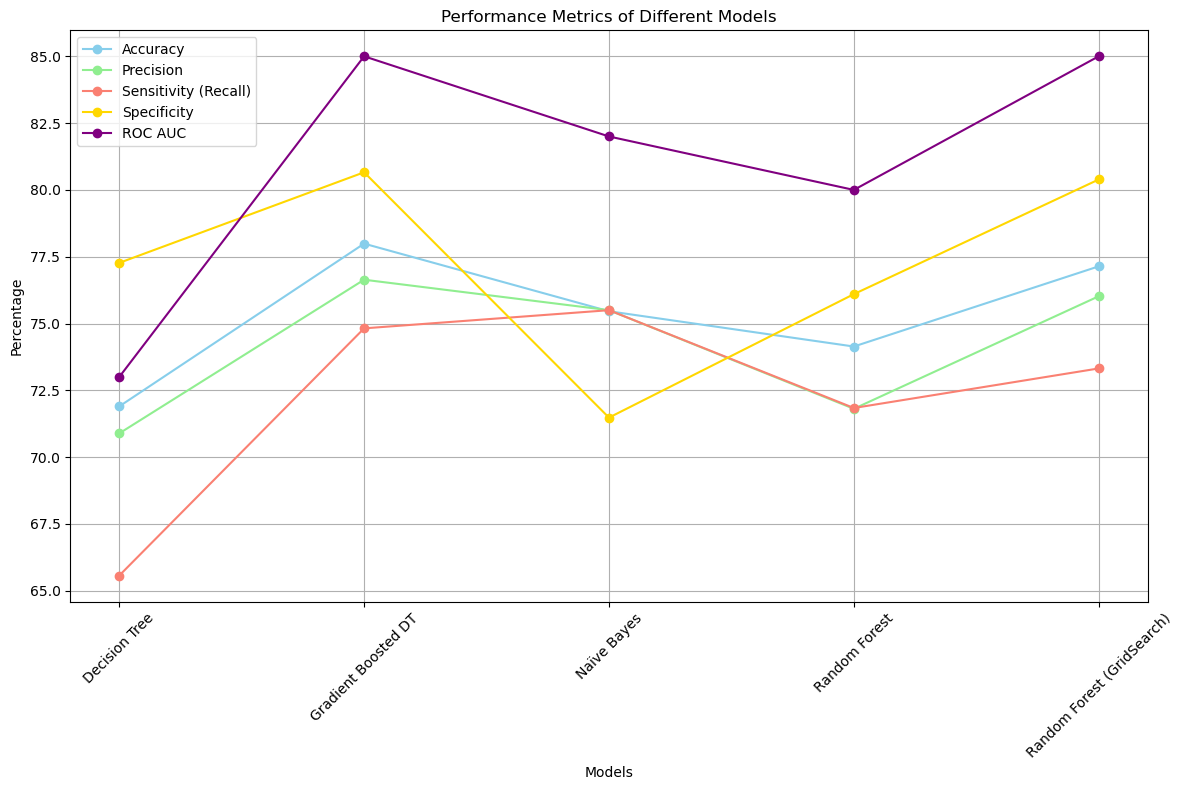

In [ ]:

models = ['Decision Tree', 'Gradient Boosted DT', 'Naïve Bayes', 'Random Forest', 'Random Forest (GridSearch)']
accuracy = [71.90, 77.99, 75.46, 74.14, 77.14]
precision = [70.89, 76.64, 75.50, 71.81, 76.02]
sensitivity = [65.57, 74.82, 75.50, 71.84, 73.32]
specificity = [77.27, 80.66, 71.48, 76.10, 80.39]
roc_auc = [73, 85, 82, 80, 85]

plt.figure(figsize=(12, 8))

plt.plot(models, accuracy, marker='o', label='Accuracy', color='skyblue')

plt.plot(models, precision, marker='o', label='Precision', color='lightgreen')

plt.plot(models, sensitivity, marker='o', label='Sensitivity (Recall)', color='salmon')

plt.plot(models, specificity, marker='o', label='Specificity', color='gold')

plt.plot(models, roc_auc, marker='o', label='ROC AUC', color='purple')

plt.legend()

plt.xticks(rotation=45)

plt.title('Performance Metrics of Different Models')
plt.xlabel('Models')
plt.ylabel('Percentage')

plt.grid(True)
plt.tight_layout()
plt.show()


Based on the above, the best model to use predict the uptake of the seasonal flu vaccine is the Gradient boosted Decision Tree followed by the hyperparameter tuned Random forest.

For the baseline models, Naive Bayes classifier performs better than Decision tree.

RECOMMENDATIONS

Emphasize vaccine efficacy. Highlight the effectiveness of the vaccine in preventing flu-related complications while at the same time raising awareness on the risks associated with seasonal flu.

Promote Doctor recommendations. Encourage healthcare providers to recommend seasonal flu vaccination to their patients, especially those with chronic health conditions.

Implement targeted vaccination campaigns aimed at older people. Avail more vaccines to nursing homes.

Promote hygiene practices such as wearing facemasks and washing hands. These seem to promote health seeking behaviour consequently leading to increased uptake of the seasonal flu vaccine.